### Activating Virtual Environment
source venv/bin/activate

### Deactive Virtual Environment
deactivate

In [57]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import kagglehub 
from kagglehub import KaggleDatasetAdapter


In [37]:
# Set the paths to the training and testing files
train_file_path = "Blood_samples_dataset_balanced_2(f).csv"
test_file_path = "blood_samples_dataset_test.csv"

# Load the training dataset
train_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ehababoelnaga/multiple-disease-prediction",
    train_file_path,
)

# Load the testing dataset
test_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ehababoelnaga/multiple-disease-prediction",
    test_file_path,
)

# Combine the datasets
combined_df = combined_df = pd.concat([train_df, test_df], axis=0)

/var/folders/st/rn530dbj3yjblz3l6_6qpf8c0000gn/T/ipykernel_84256/599372038.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  train_df = kagglehub.load_dataset(
/var/folders/st/rn530dbj3yjblz3l6_6qpf8c0000gn/T/ipykernel_84256/599372038.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  test_df = kagglehub.load_dataset(


# <b>Data Exploration

In [ ]:
combined_df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [41]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                       

In [42]:
combined_df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.395643,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.266795,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.189918,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.335778,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.597671,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


In [43]:
# Checking to see if there are any duplicates within the dataset
print(f"Dataset duplicates: {combined_df.duplicated().sum()}")

Dataset duplicates: 2286


In [68]:
# Dropping duplicates from the training dataset
cleaned_combine = combined_df.drop_duplicates()
print(f"Removed duplicates from the combined df: {cleaned_combine.duplicated().sum()}")

Removed duplicates from the combined df: 0


# <b>Data Visualization

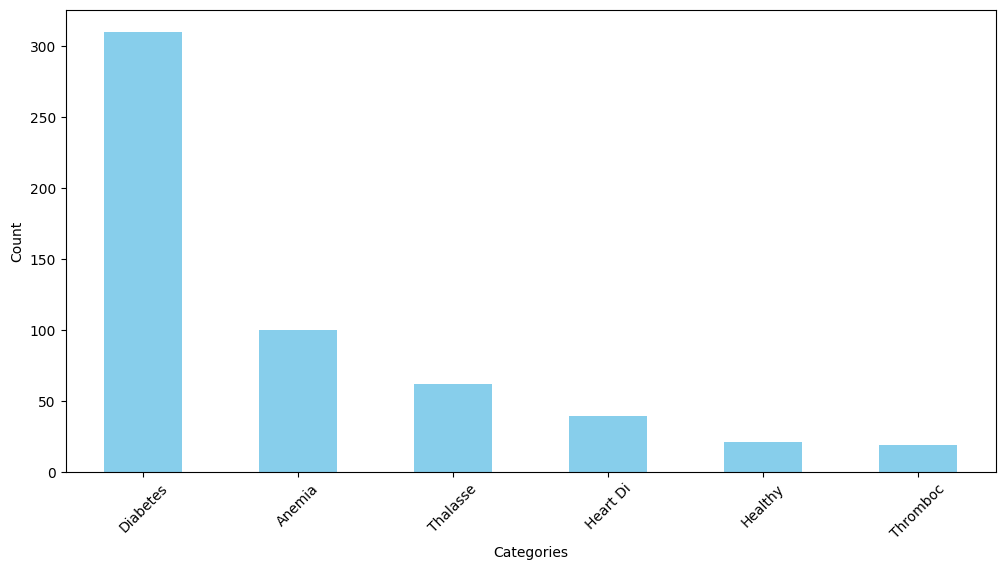

In [69]:
column = "Disease"

value_counts = cleaned_combine[column].value_counts()

plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

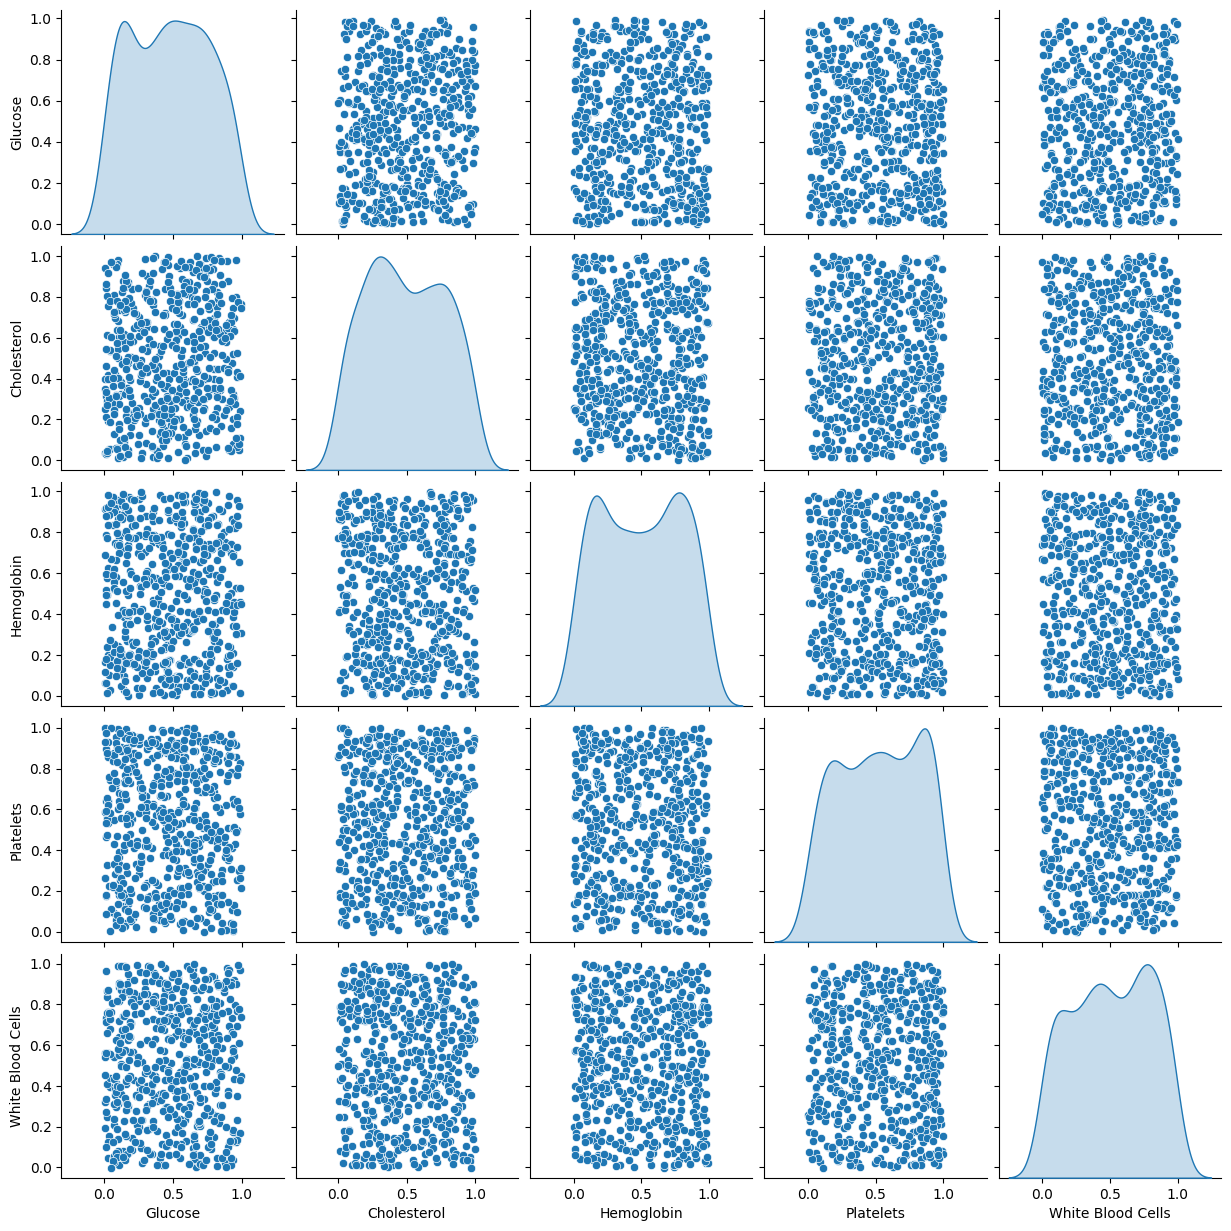

In [46]:
numeric_features = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells']
sns.pairplot(cleaned_combine[numeric_features], diag_kind='kde')
plt.show()

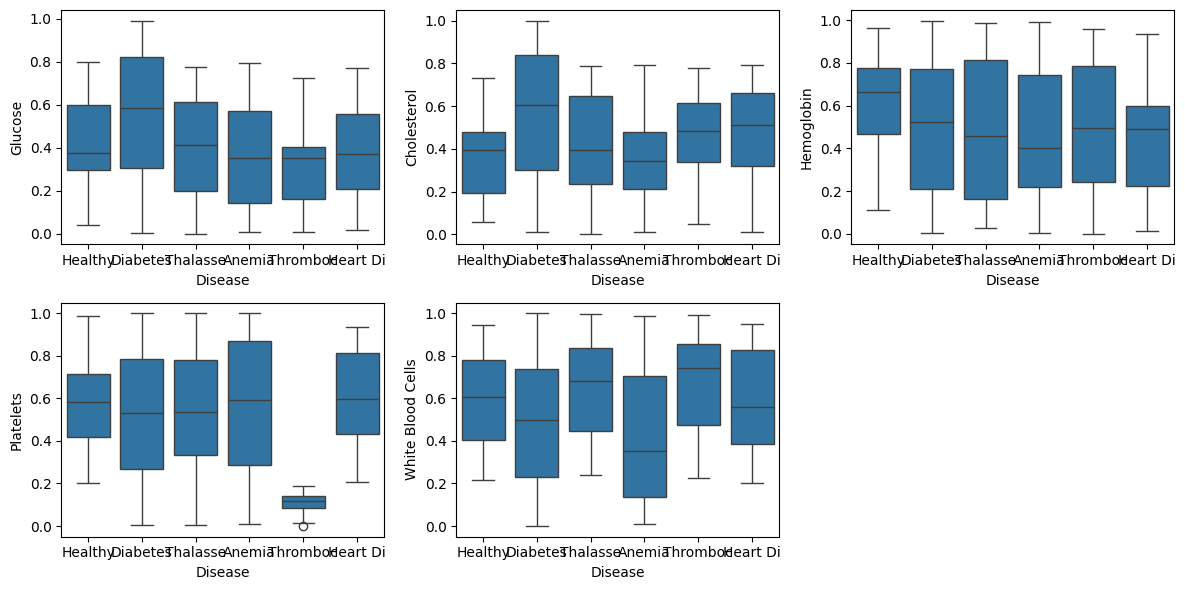

In [47]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Disease', y=feature, data=cleaned_combine)
plt.tight_layout()
plt.show()

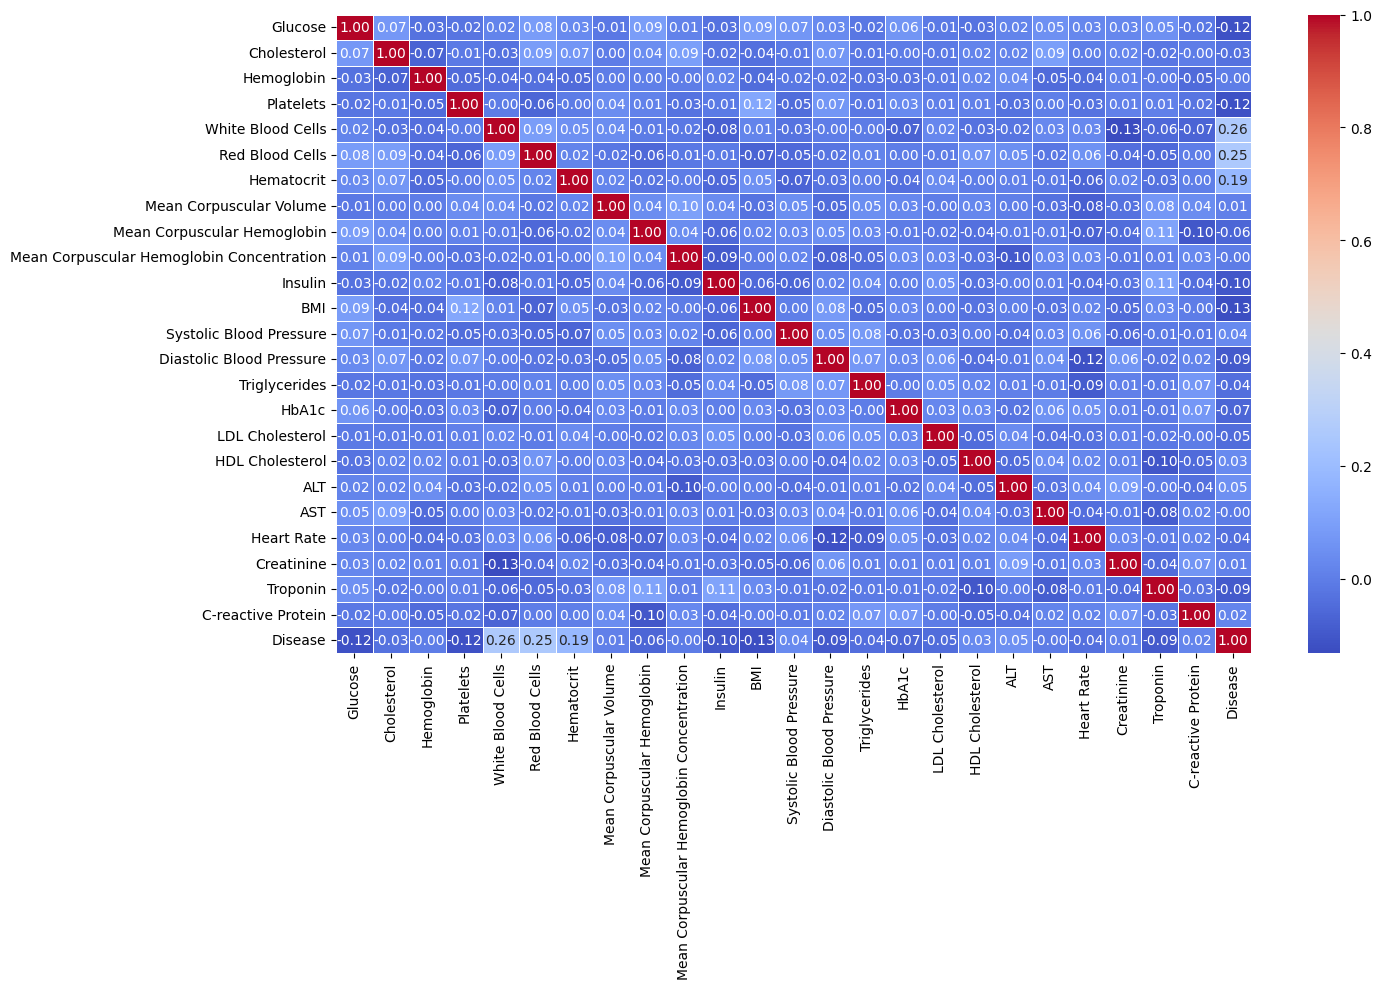

In [50]:
df_encoded = cleaned_combine.copy()

# Encode object/string columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(15,10))

sns.heatmap(df_encoded.corr(), annot=True,cmap='coolwarm', fmt = ".2f", linewidth=0.5)

plt.tight_layout()
plt.show()

# <b>Logistic Regression</b>
#### A statisical model that predicts a binary outcome based on one or more predictor values (e.g. Does this patient have a disease? Yes or No | 0 or 1)
1. So the input are the categorical features (columns) like glucose, cholesterol, age, etc.
2. A probability between 0 -> 1 (Uses an S-shaped curve called the sigmoif function to squeeze the values into a 0 -> 1 range).

#### The key idea:
- If the probability is >= 0.5, predict "yes" (has a disease)
- If the probability is < 0.5, predict "no" (does not have a disease)

In [91]:
df = combined_df.drop('Disease', axis=1)
df.shape

# Use SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(df, combined_df['Disease']) 
print("shape of resampled x:", X_train_resampled.shape)
print("shape of resampled y:", y_train_resampled.shape)   


# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=0)
print(f"Shape of x-train: {x_train.shape} | Shape of y-train: {y_train.shape}")
print(f"Shape of x-test: {x_test.shape} | Shape of y-test: {y_test.shape}")

# Train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_train)
y_proba = model.predict_proba(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
print(classification_report(y_train, y_pred))

shape of resampled x: (1860, 24)
shape of resampled y: (1860,)
Shape of x-train: (1488, 24) | Shape of y-train: (1488,)
Shape of x-test: (372, 24) | Shape of y-test: (372,)
Accuracy: 0.7513440860215054
              precision    recall  f1-score   support

      Anemia       0.75      0.71      0.73       241
    Diabetes       0.69      0.59      0.64       245
     Healthy       0.71      0.86      0.78       244
    Heart Di       0.70      0.68      0.69       253
    Thalasse       0.72      0.68      0.70       258
    Thromboc       0.92      1.00      0.96       247

    accuracy                           0.75      1488
   macro avg       0.75      0.75      0.75      1488
weighted avg       0.75      0.75      0.75      1488

